<a href="https://colab.research.google.com/github/harisariefkamis/Final-Project-DAB14/blob/main/Salinan_dari_chapter_1websitte_data_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEMBANGUN INFRASTRUKTUR WEBSITE DINAMIS DI PYTHON
(Google Colab – Versi Data Analyst)

#Setup Lingkungan Python di Colab

In [ ]:
# Core data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (opsional)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("Environment ready")

Environment ready


In [ ]:
!pip install streamlit pyngrok

In [ ]:
!mkdir data
!mkdir app
!mkdir output

In [ ]:
import pandas as pd
data_orders = pd.read_csv("/content/sample_data/orders.csv")
data_orders.info()
data_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_id    9994 non-null   object 
 2   postal_code    9994 non-null   int64  
 3   product_id     9994 non-null   object 
 4   sales          9994 non-null   float64
 5   quantity       9994 non-null   int64  
 6   discount       9994 non-null   float64
 7   profit         9994 non-null   float64
 8   category       9994 non-null   object 
 9   subcategory    9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  order_date     9994 non-null   object 
 12  ship_date      9994 non-null   object 
 13  ship_mode      9994 non-null   object 
 14  customer_name  9994 non-null   object 
 15  segment        9994 non-null   object 
 16  country        9994 non-null   object 
 17  city           9994 non-null   object 
 18  state   

,0
order_id,0
customer_id,0
postal_code,0
product_id,0
sales,0
quantity,0
discount,0
profit,0
category,0
subcategory,0


In [ ]:
import pandas as pd
data_orders = pd.read_csv("/content/sample_data/orders.csv")
data_orders.dropna()
data_orders.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_id    9994 non-null   object 
 2   postal_code    9994 non-null   int64  
 3   product_id     9994 non-null   object 
 4   sales          9994 non-null   float64
 5   quantity       9994 non-null   int64  
 6   discount       9994 non-null   float64
 7   profit         9994 non-null   float64
 8   category       9994 non-null   object 
 9   subcategory    9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  order_date     9994 non-null   object 
 12  ship_date      9994 non-null   object 
 13  ship_mode      9994 non-null   object 
 14  customer_name  9994 non-null   object 
 15  segment        9994 non-null   object 
 16  country        9994 non-null   object 
 17  city           9994 non-null   object 
 18  state   

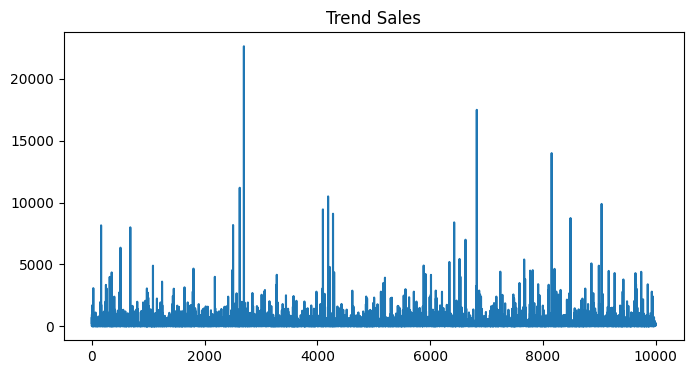

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_orders = pd.read_csv("/content/sample_data/orders.csv")
data_orders.info()
data_orders.isnull().sum()
#EDA
plt.figure(figsize=(8,4))
plt.plot(data_orders['sales'])
plt.title("Trend Sales")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_orders = pd.read_csv("/content/sample_data/orders.csv")

# Pastikan kolom tanggal
data_orders['order_date'] = pd.to_datetime(data_orders['order_date'])

In [ ]:
total_sales = data_orders['sales'].sum()
total_profit = data_orders['profit'].sum()
total_orders = data_orders['order_id'].nunique()

print("Total Sales  :", round(total_sales,2))
print("Total Profit :", round(total_profit,2))
print("Total Orders :", total_orders)

Total Sales  : 2297200.86
Total Profit : 286397.02
Total Orders : 5009


/tmp/ipython-input-2361875567.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2361875567.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2361875567.py:38: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2361875567.py:38: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pyl

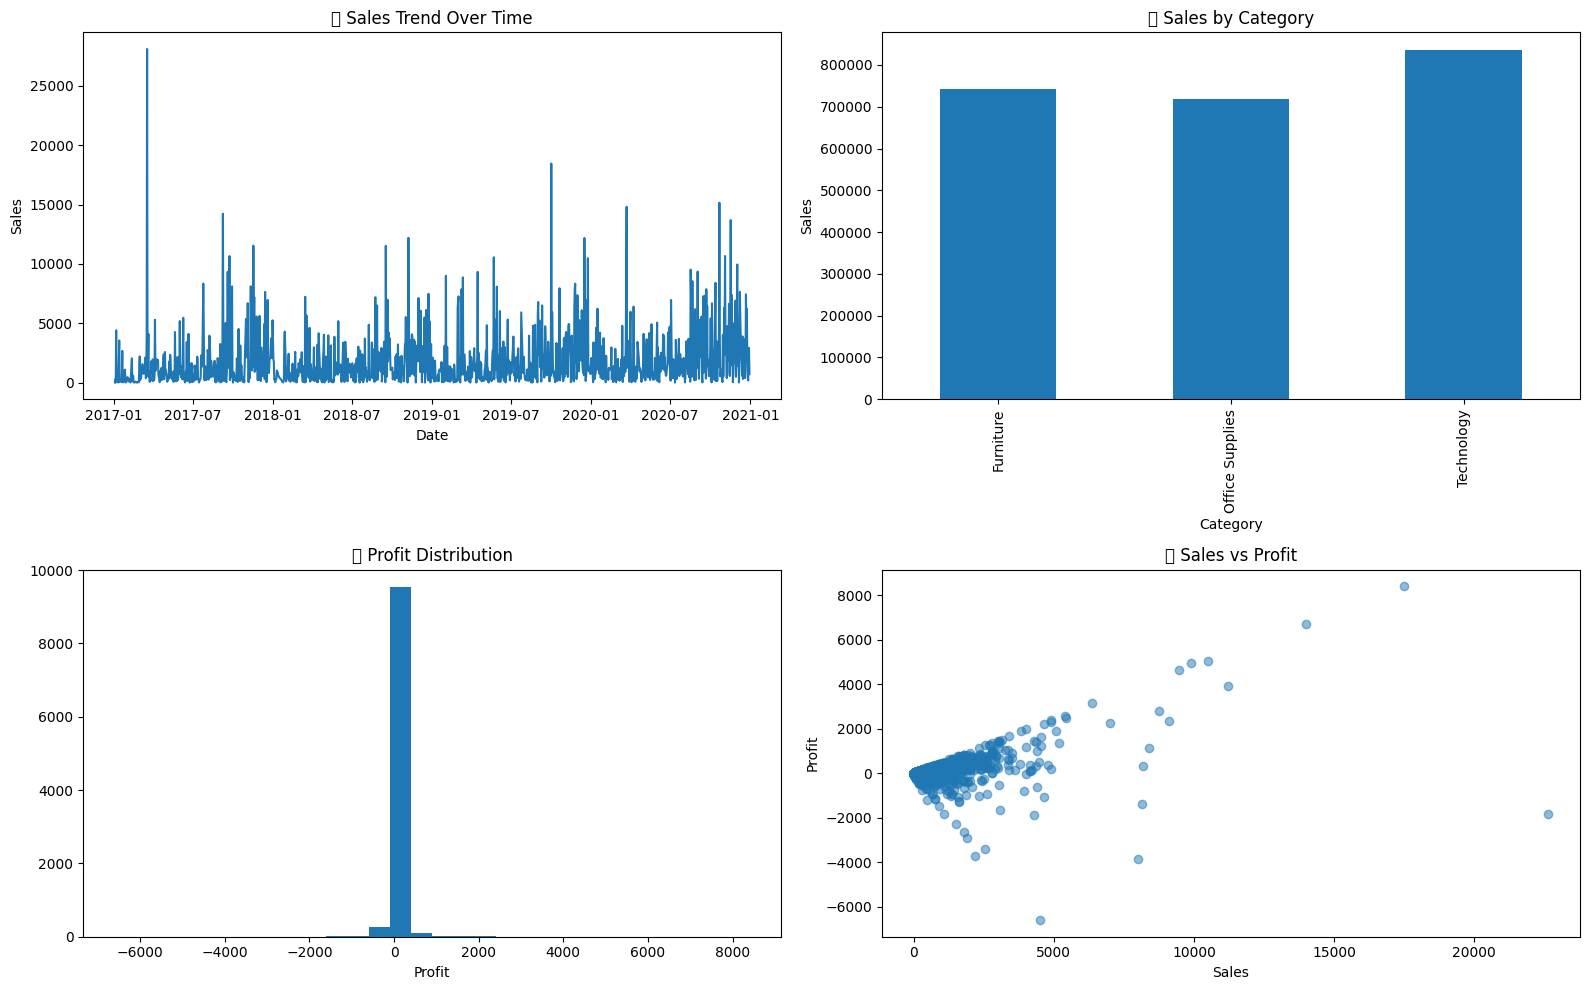

In [ ]:
plt.figure(figsize=(16,10))

# ======================
# 1. Trend Sales
# ======================
plt.subplot(2,2,1)
plt.plot(data_orders.groupby('order_date')['sales'].sum())
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")

# ======================
# 2. Sales by Category
# ======================
plt.subplot(2,2,2)
data_orders.groupby('category')['sales'].sum().plot(kind='bar')
plt.title("📊 Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")

# ======================
# 3. Profit Distribution
# ======================
plt.subplot(2,2,3)
plt.hist(data_orders['profit'], bins=30)
plt.title("📦 Profit Distribution")
plt.xlabel("Profit")

# ======================
# 4. Sales vs Profit
# ======================
plt.subplot(2,2,4)
plt.scatter(data_orders['sales'], data_orders['profit'], alpha=0.5)
plt.title("💰 Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(
    page_title="Dashboard Analyst",
    layout="wide"
)

# Load data
data_orders = pd.read_csv("orders.csv")
data_orders['order_date'] = pd.to_datetime(data_orders['order_date'])

st.title("📊 Sales Dashboard")

Overwriting app.py


In [ ]:
fig = plt.figure(figsize=(16,10))

# 1. Trend Sales
plt.subplot(2,2,1)
plt.plot(data_orders.groupby('order_date')['sales'].sum())
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")

# 2. Sales by Category
plt.subplot(2,2,2)
data_orders.groupby('category')['sales'].sum().plot(kind='bar')
plt.title("📊 Sales by Category")

# 3. Profit Distribution
plt.subplot(2,2,3)
plt.hist(data_orders['profit'], bins=30)
plt.title("📦 Profit Distribution")

# 4. Sales vs Profit
plt.subplot(2,2,4)
plt.scatter(data_orders['sales'], data_orders['profit'], alpha=0.5)
plt.title("💰 Sales vs Profit")

plt.tight_layout()

st.pyplot(fig)

/tmp/ipython-input-3324078842.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324078842.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324078842.py:25: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324078842.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
2025-12-28 00:08:30.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.12/dist-packages/streamlit/elements/pyplot.py:225: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.savefig(image, **kwargs)
/usr/local/lib/python3.12/dist-packages/streamlit/elements/pyplot.py:225: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

DeltaGenerator()

In [ ]:
# The Streamlit metric calls have been moved to app/app.py

In [ ]:
%%writefile app/app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("📊 Dashboard Analyst")

# Pastikan file output/clean_data.csv telah dibuat dan disimpan di langkah sebelumnya
data_orders = pd.read_csv("output/clean_data.csv")

# Calculate metrics for Streamlit app
total_sales = data_orders['sales'].sum()
total_profit = data_orders['profit'].sum()
total_orders = data_orders['order_id'].nunique()

st.subheader("Key Metrics")
col1, col2, col3 = st.columns(3)
with col1:
    st.metric("Total Sales", f"{total_sales:,.0f}")
with col2:
    st.metric("Total Profit", f"{total_profit:,.0f}")
with col3:
    st.metric("Total Orders", total_orders)

st.subheader("Preview Data")
st.dataframe(data_orders.head())

st.subheader("Sales Trend")
fig, ax = plt.subplots()
ax.plot(data_orders['sales'])
st.pyplot(fig)

Overwriting app/app.py


In [ ]:
import streamlit as st

col1, col2, col3 = st.columns(3)

col1.metric("Total Sales", f"{data_orders['sales'].sum():,.0f}")
col2.metric("Total Profit", f"{data_orders['profit'].sum():,.0f}")
col3.metric("Total Orders", data_orders['order_id'].nunique())
plt.show()

2025-12-28 00:05:21.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:21.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 00:05:22.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import os
os.makedirs('output', exist_ok=True)
print("Direktori 'output' telah dibuat atau sudah ada.")

Direktori 'output' telah dibuat atau sudah ada.


In [ ]:
import pandas as pd

# Save the data_orders DataFrame to a CSV file for the Streamlit app
data_orders.to_csv("output/clean_data.csv", index=False)

print("Clean data saved to output/clean_data.csv")

Clean data saved to output/clean_data.csv


In [ ]:
import pandas as pd

# Save the data_orders DataFrame to a CSV file for the Streamlit app
data_orders.to_csv("/content/sample_data/orders.csv", index=False)

print("Clean data saved to output/clean_data.csv")

Clean data saved to output/clean_data.csv


In [ ]:
!mkdir -p app # Pastikan direktori 'app' ada

In [ ]:
import os
os.makedirs('my_new_directory', exist_ok=True)
os.makedirs('data/processed_data', exist_ok=True)

In [ ]:
!streamlit run app/app.py &>/content/logs.txt &

In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.6 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("37RscbuNt6YPx6qbPaXi13kIMWR_2ZBGVkZXtNkKeJt1bnaTF") # Ganti dengan token ngrok Anda yang sebenarnya

In [ ]:
"YOUR_AUTH_TOKEN"

'YOUR_AUTH_TOKEN'

In [ ]:
!streamlit run app/app.py &>/content/logs.txt &

In [ ]:
public_url = ngrok.connect(8501)
print(public_url, 'https://dashboard.ngrok.com/get-started/your-authtoken')

NgrokTunnel: "https://maris-supersignificant-drema.ngrok-free.dev" -> "http://localhost:8501" https://dashboard.ngrok.com/get-started/your-authtoken
